<a href="https://www.kaggle.com/code/hikmatullahmohammadi/reservation-cancellation-simple-dnn-tf-keras?scriptVersionId=119296586" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id='0'></a>
# Kaggle PS,S3,Ep7 | Reservation Cancellation Prediction | Keras | DNN

# Easy Navigation

- [1- Data Exploration](#1)
- [2- Data Preprocessing](#2)
- [3- Modeling (DNN)](#3)
    - [3.1- Model Construction](#3-1)
    - [3.2- Model Utilization & Submission](#3-2)

## Dataset Description:

Customer behavior and booking possibilities have been radically changed by online hotel reservation channels. Cancellations or no-shows cause a significant number of hotel reservations to be canceled. Cancellations can be caused by a variety of factors, such as scheduling conflicts, changes in plans, etc. In many cases, this is made easier by the possibility of doing so free or at a low cost, which is beneficial for hotel guests but less desirable and possibly revenue-diminishing for hotels.<br><br>

As a Data Scientist, your job is to build a Machine Learning model to help the Hotel Owners better understand if the customer is going to honor the reservation or cancel it ?<br><br>


**This data frame contains the following columns:**<br>
- **Booking_ID:** unique identifier of each booking
- **No of adults:** Number of adults
- **No of children:** Number of Children
- **noofweekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- **noofweek_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- **typeofmeal_plan:** Type of meal plan booked by the customer:
- **requiredcarparking_space:** Does the customer require a car parking space? (0 - No, 1- Yes)
- **roomtypereserved:** Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
- **lead_time:** Number of days between the date of booking and the arrival date
- **arrival_year:** Year of arrival date
- **arrival_month:** Month of arrival date
- **arrival_date:** Date of the month
- **Market segment type:** Market segment designation.
- **repeated_guest:** Is the customer a repeated guest? (0 - No, 1- Yes)
- **noofprevious_cancellations:** Number of previous bookings that were canceled by the customer prior to the current booking
- **noofpreviousbookingsnot_canceled:** Number of previous bookings not canceled by the customer prior to the current booking
- **avgpriceper_room:** Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- **noofspecial_requests:** Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- **booking_status:** Flag indicating if the booking was canceled or not.
<br><br>

<a id='1'></a>
# 1- Data Exploration

In [1]:
# import required libraies/dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from warnings import simplefilter
simplefilter('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential

In [2]:
# load the datasets
df_train = pd.read_csv('/kaggle/input/playground-series-s3e7/train.csv', index_col=0)
df_test = pd.read_csv('/kaggle/input/playground-series-s3e7/test.csv', index_col=0)
df_orig = pd.read_csv('/kaggle/input/reservation-cancellation-prediction/train__dataset.csv')

In [3]:
print(f'Training set shape: {df_train.shape}')
print(f'Test set shape: {df_test.shape}')
print(f'Original dataset shape: {df_orig.shape}')

Training set shape: (42100, 18)
Test set shape: (28068, 17)
Original dataset shape: (18137, 18)


In [4]:
df_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
id,,,,,,,,,,,,,,,,,,
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [5]:
# combine with the original dataset
df_train = pd.concat([df_train, df_orig])
df_train.index = np.arange(df_train.shape[0])
df_train.shape

(60237, 18)

In [6]:
# look for missing values
df_train.isnull().sum().sum()

0

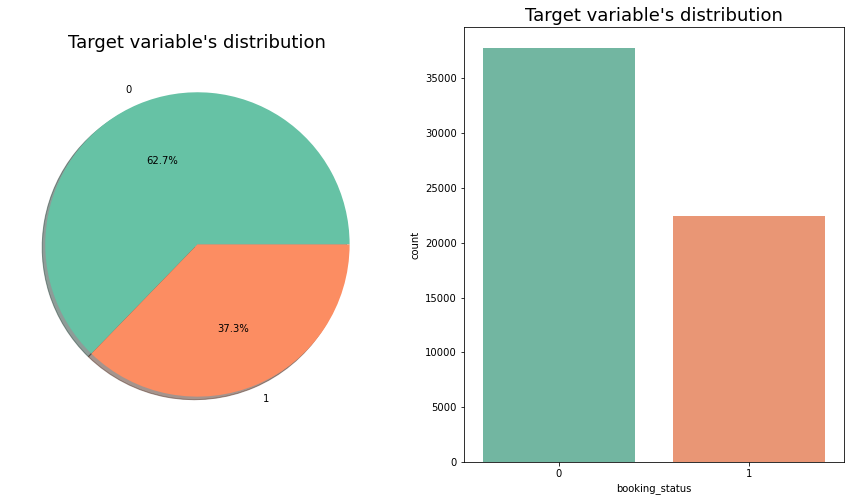

In [7]:
# Target Variable Distribution
# draw plots to see how the target variable is distributed
plt.figure(figsize=(15, 8))
sns.set_palette('Set2')

plt.subplot(1, 2, 1)
plt.pie(
    x = df_train['booking_status'].value_counts(),
    labels=df_train['booking_status'].value_counts().index,
    autopct='%1.1f%%',
    shadow=True,
    startangle=0
)
plt.title(f'Target variable\'s distribution' , fontdict={'fontsize': 18})    

plt.subplot(1, 2, 2)
ax = sns.countplot(df_train['booking_status'])
ax.set_title(f'Target variable\'s distribution' , fontdict={'fontsize': 18})
plt.show()    

<a id='2'></a>
# 2- Preprocessing

In [8]:
# separate features from the target variable
X = df_train.drop('booking_status', axis=1)
y = df_train['booking_status']

In [9]:
# Data normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
df_test = scaler.fit_transform(df_test)

In [10]:
# split the dataset into train and val sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=100, test_size=0.1, shuffle=True)

In [11]:
# define the training and the test sets
training_set = tf.data.Dataset.from_tensors((X_train, y_train))
val_set = tf.data.Dataset.from_tensors((X_val, y_val))
test_set = tf.data.Dataset.from_tensors((df_test,))

from IPython.display import clear_output
clear_output()

In [12]:
# define batches
training_batches = training_set.batch(128)
val_batches = val_set.batch(128)
test_batches = test_set.batch(128)

<a id='3'></a>
# 3- Modeling

<a id='3-1'></a>
## 3.1- Training


We will use Keras functional model so that we can have more than one output. We will have two outputs both of which are the probabilities of the booking status to be 1. Finally, we will compute the mean of them to finalize the prediction.

In [13]:
# Build the model
def build_model(input_shape):
    # input layer
    inputs =  keras.Input(shape=input_shape)
    
    # hidden layers
    x1 = layers.Dense(256, activation='relu')(inputs)
    x1 = layers.Dropout(.4)(x1)
    x2 = layers.Dense(300, activation='relu')(inputs)
    x2 = layers.Dropout(.4)(x2)
    
    
    x1 = layers.Dense(128, activation='relu')(x1)
    x2 = layers.Dense(96, activation='relu')(x2)
    
    x1 = layers.Dense(64, activation='relu')(x1)
    x2 = layers.Dense(50, activation='relu')(x2)
    
    x1 = layers.Dense(32, activation='relu')(x1)
    x2 = layers.Dense(32, activation='relu')(x2)
    
    x1 = layers.Dense(16, activation='relu')(x1)
    x2 = layers.Dense(16, activation='relu')(x2)
    
    
    # output layer
    output1 = layers.Dense(1, activation='sigmoid', name='Y-1')(x1)
    output2 = layers.Dense(1, activation='sigmoid', name='Y-2')(x2)
    
    return keras.Model(inputs, outputs=[output1, output2])

model = build_model(input_shape=(None, 17))
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, 17)]   0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, None, 256)    4608        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, None, 300)    5400        input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, None, 256)    0           dense[0][0]                      
______________________________________________________________________________________________

In [14]:
# compile and train the model
model.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=[tf.metrics.AUC()]
)

EPOCHS = 1000

history = model.fit(training_batches, validation_data=val_batches, epochs=EPOCHS, verbose=0)

# clear the outputs/wornings
from IPython.display import clear_output
clear_output()

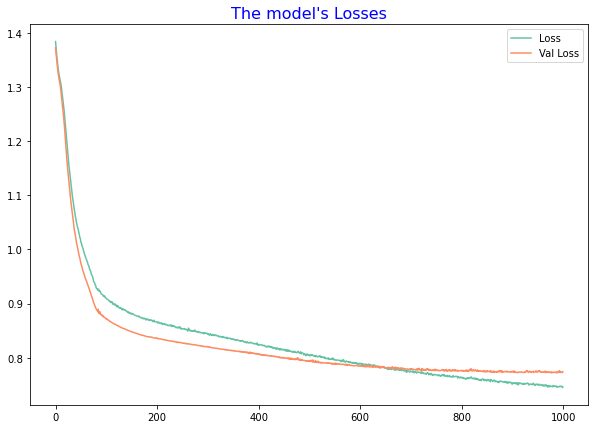

In [15]:
# let's plot the losses
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Val Loss'])
plt.title('The model\'s Losses', fontdict={'fontsize': 16, 'color': 'blue'})
plt.show()

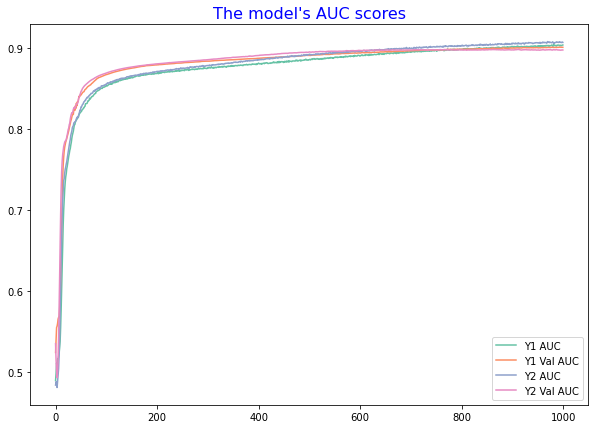

In [16]:
y_1_auc_score, y_1_val_score = list(history.history.keys())[3], list(history.history.keys())[8]
y_2_auc_score, y_2_val_score = list(history.history.keys())[4], list(history.history.keys())[9]

# let's plot the AUC scores
plt.figure(figsize=(10, 7))

plt.plot(history.history[y_1_auc_score])
plt.plot(history.history[y_1_val_score])
plt.plot(history.history[y_2_auc_score])
plt.plot(history.history[y_2_val_score])


plt.legend(['Y1 AUC', 'Y1 Val AUC', 'Y2 AUC', 'Y2 Val AUC'])
plt.title('The model\'s AUC scores', fontdict={'fontsize': 16, 'color': 'blue'})
plt.show()

<a id='3-2'></a>
## 3.2- Prediction & Submission

In [17]:
# predict on the test set
test_preds = np.array(model.predict(test_batches))

'''
Note that the model predicts two outputs both of which are booking_status
but they are predicted using different architectures.
We will use the mean of them to finalize the submission file.
''' 
# mean
preds = test_preds.reshape(2, 28068).mean(axis=0)
preds.shape

(28068,)

In [18]:
# create submission file
sub = pd.read_csv('/kaggle/input/playground-series-s3e7/sample_submission.csv')
sub['booking_status'] = preds
sub.head()

,id,booking_status
0,42100,0.055972
1,42101,0.029510
2,42102,0.276259
3,42103,0.120349
4,42104,0.261454


In [19]:
# write to submission file
sub.to_csv('./submission.csv', index=False)
print('Done...')

Done...


# Thanks :)
By: <br>
[Hikmatullah Mohammadi](https://kaggle.com/hikmatullahmohammadi)<br>

[Go to top](#0)